In [1]:
import numpy as np
import pandas as pd
import random as random

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix

import numpy as np
import numpy.random as r

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

train_data =  np.array(train_df)
test_data =  np.array(test_df)
data = np.concatenate((train_data, test_data), axis=0)

X_train = np.array(train_data[:,1:])
y_train = np.array(train_data[:,0])
X_test = np.array(test_data[:,1:])
y_test = np.array(test_data[:,0]) 

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

c is 0.0001
test accuracy is: 0.8574
train accuracy is: 0.8671666666666666


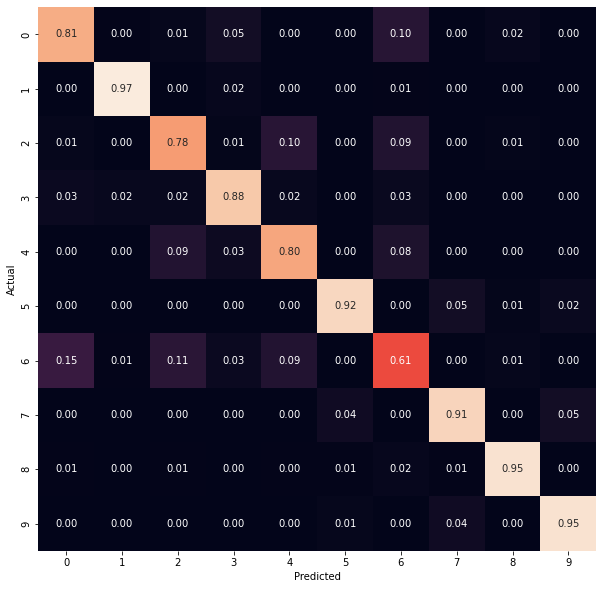

In [5]:
c = .0001
clf = LogisticRegression(penalty='none', tol=0.1, solver='saga').fit(X_train_scaled, y_train)
    
y_pred = clf.predict(X_test_scaled)
    
print('c is',c)
print('test accuracy is:',accuracy_score(y_test, y_pred))
print('train accuracy is:',accuracy_score(y_train, clf.predict(X_train_scaled)))
    
cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
p = plt.figure(figsize=(10,10))
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
c *= 10



c is 0.0001
test accuracy is: 0.7611
train accuracy is: 0.7595833333333334
c is 0.001
test accuracy is: 0.824
train accuracy is: 0.8233166666666667
c is 0.01
test accuracy is: 0.8535
train accuracy is: 0.85445
c is 0.1
test accuracy is: 0.8583
train accuracy is: 0.8652166666666666
c is 1.0
test accuracy is: 0.858
train accuracy is: 0.8662833333333333
c is 10.0
test accuracy is: 0.8596
train accuracy is: 0.8663166666666666
c is 100.0
test accuracy is: 0.8593
train accuracy is: 0.867


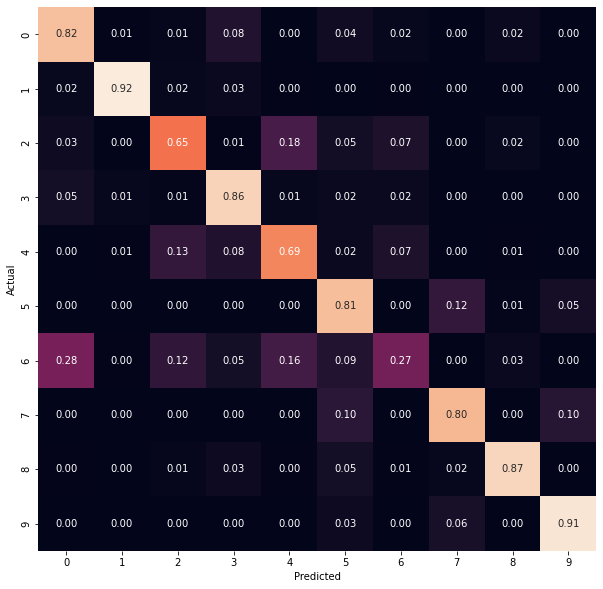

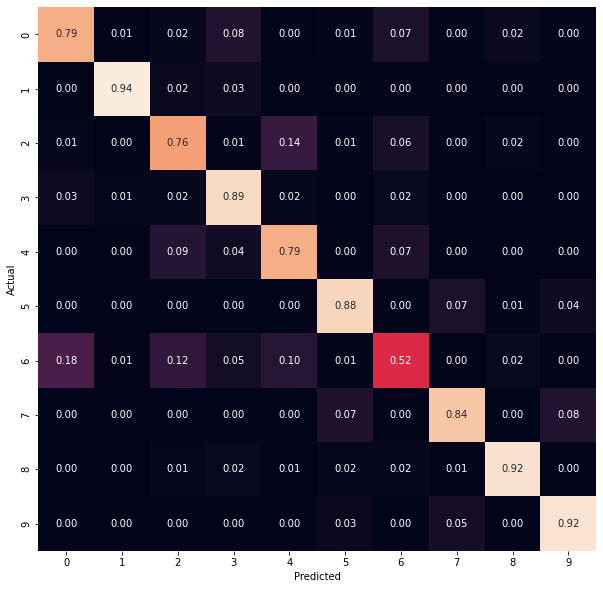

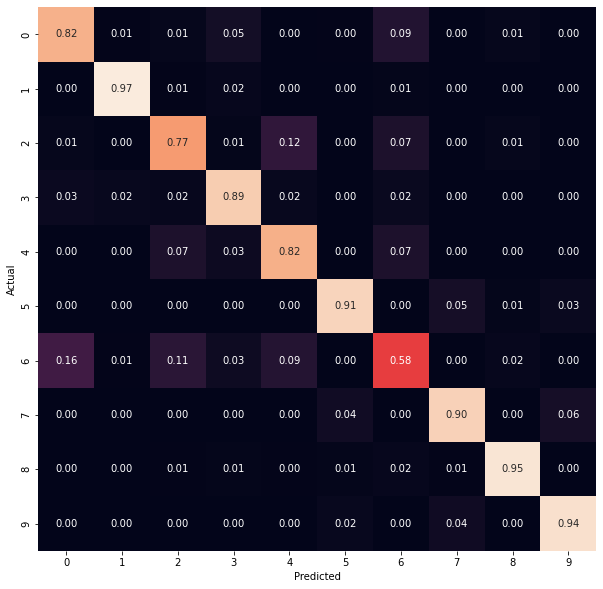

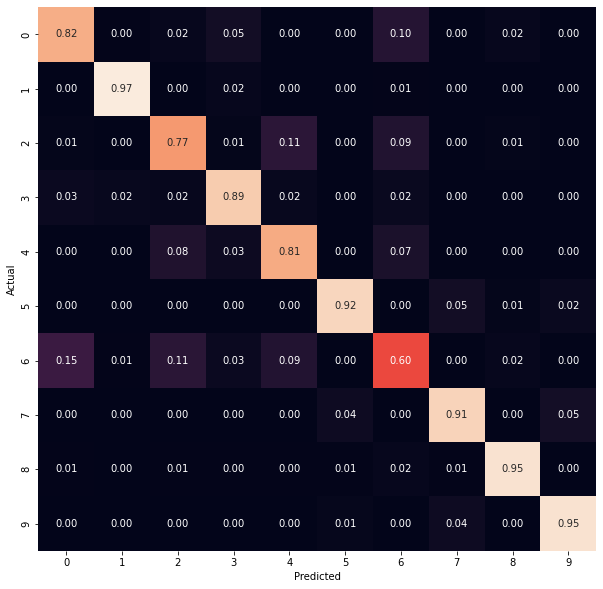

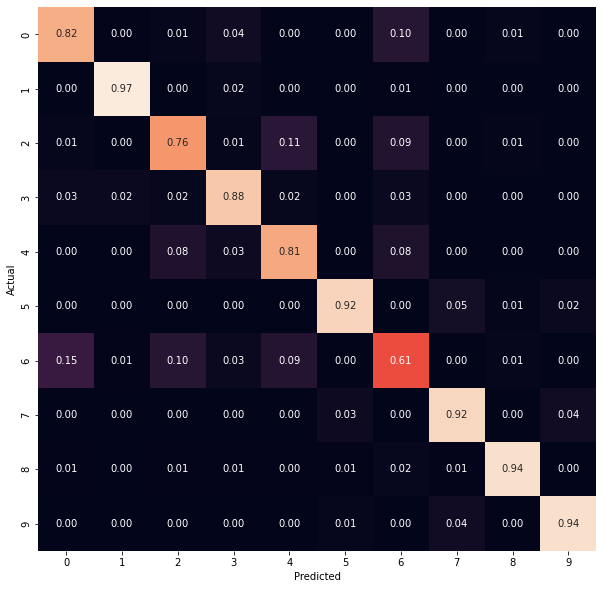

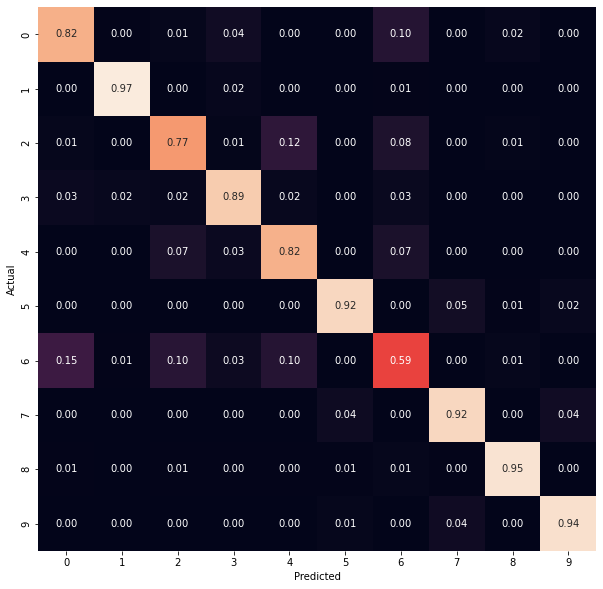

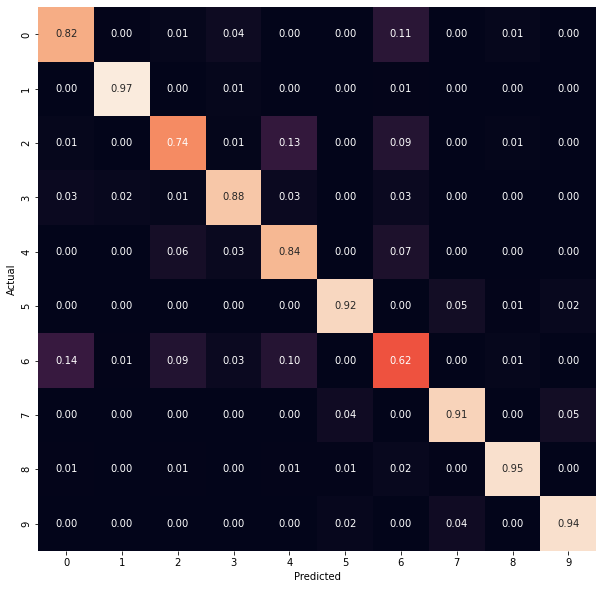

In [4]:
c = .0001
while c != 1000:
    clf = LogisticRegression(penalty='l2', tol=0.1, solver='saga',C=c).fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    
    print('c is',c)
    print('test accuracy is:',accuracy_score(y_test, y_pred))
    print('train accuracy is:',accuracy_score(y_train, clf.predict(X_train_scaled)))
    
    cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
    p = plt.figure(figsize=(10,10))
    p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
    c *= 10

c is 0.0001
test accuracy is: 0.1
train accuracy is: 0.1
c is 0.001
test accuracy is: 0.6887
train accuracy is: 0.69085
c is 0.01
test accuracy is: 0.8174
train accuracy is: 0.8196
c is 0.1
test accuracy is: 0.854
train accuracy is: 0.8584666666666667
c is 1.0
test accuracy is: 0.8583
train accuracy is: 0.8661166666666666
c is 10.0
test accuracy is: 0.8588
train accuracy is: 0.8665833333333334
c is 100.0
test accuracy is: 0.8581
train accuracy is: 0.8671833333333333


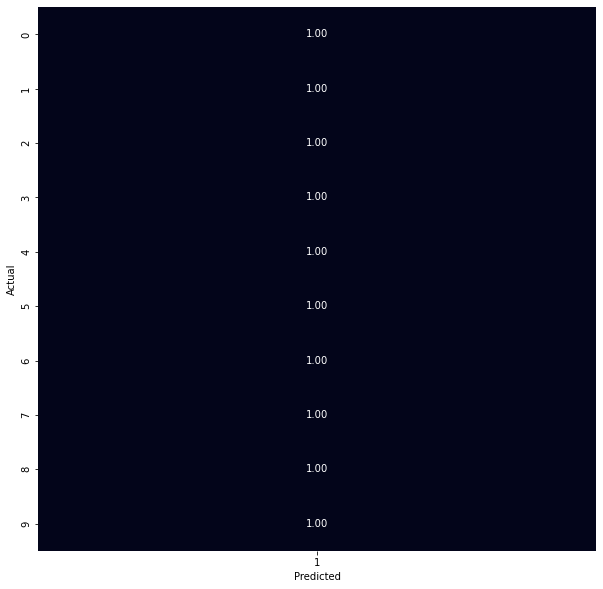

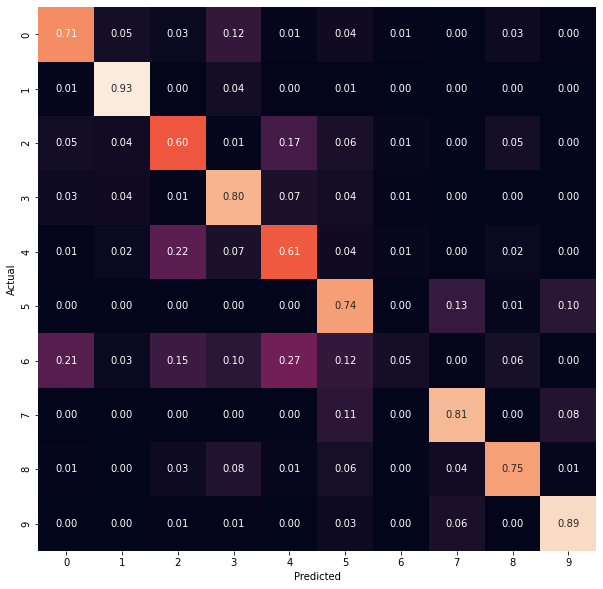

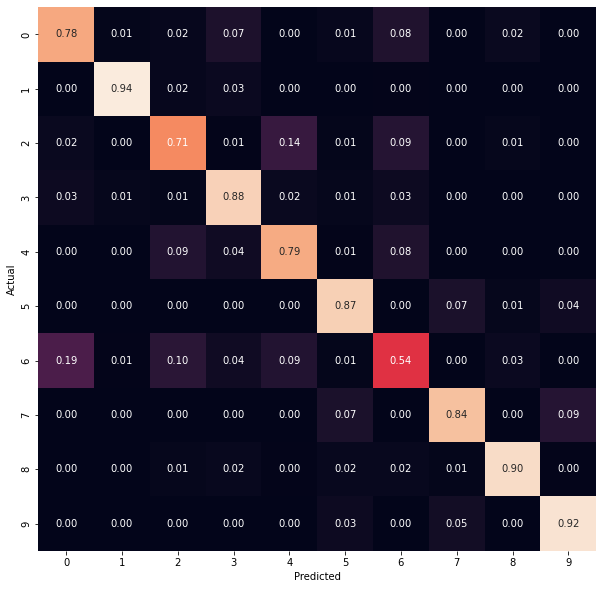

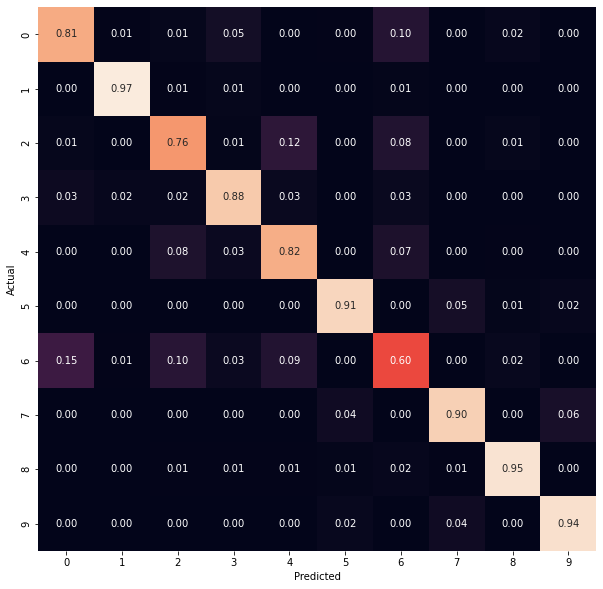

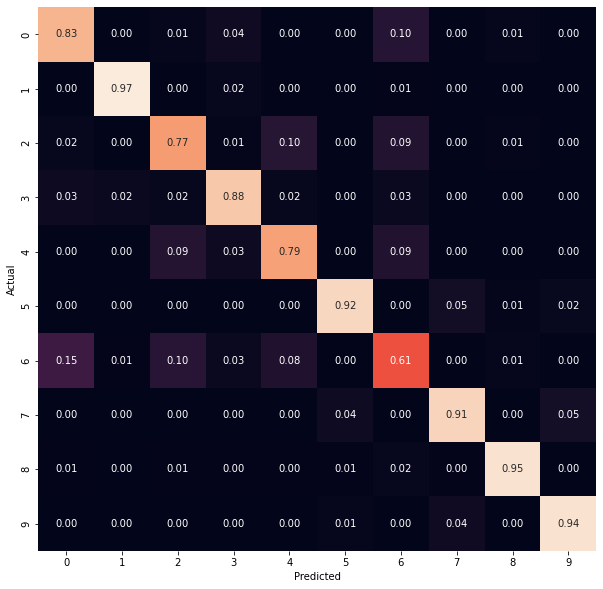

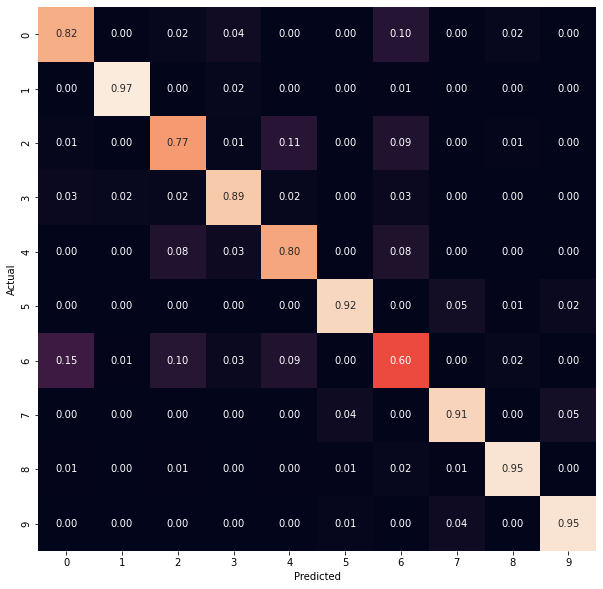

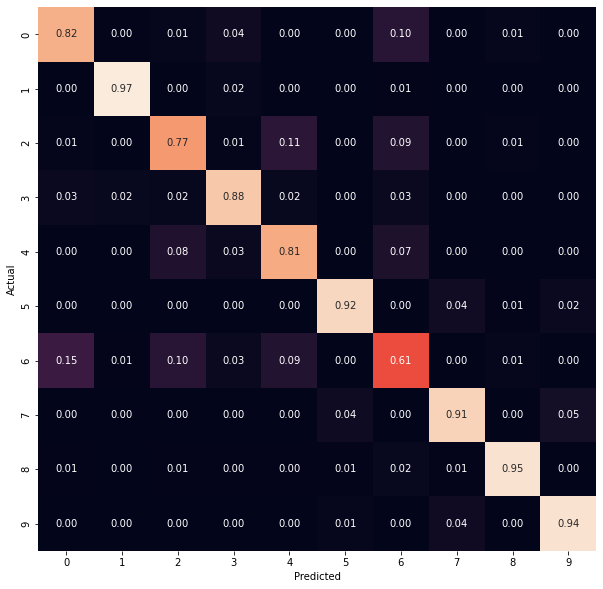

In [7]:
c = .0001
while c != 1000:
    clf = LogisticRegression(penalty='l1', tol=0.1, solver='saga',C=c).fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    
    print('c is',c)
    print('test accuracy is:',accuracy_score(y_test, y_pred))
    print('train accuracy is:',accuracy_score(y_train, clf.predict(X_train_scaled)))
    
    cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
    p = plt.figure(figsize=(10,10))
    p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
    c *= 10



c is 0.0001
test accuracy is: 0.1
train accuracy is: 0.1
c is 0.001
test accuracy is: 0.7494
train accuracy is: 0.7495333333333334
c is 0.01
test accuracy is: 0.8338
train accuracy is: 0.8332166666666667
c is 0.1
test accuracy is: 0.856
train accuracy is: 0.86215
c is 1.0
test accuracy is: 0.8586
train accuracy is: 0.86665
c is 10.0
test accuracy is: 0.8583
train accuracy is: 0.8662166666666666
c is 100.0
test accuracy is: 0.857
train accuracy is: 0.86715


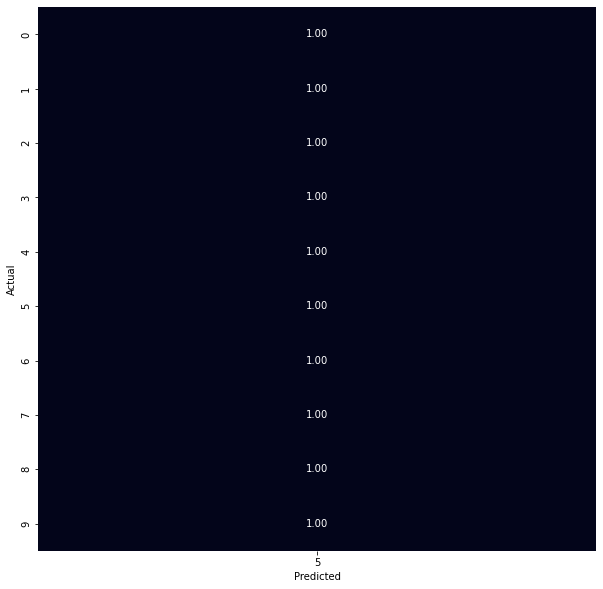

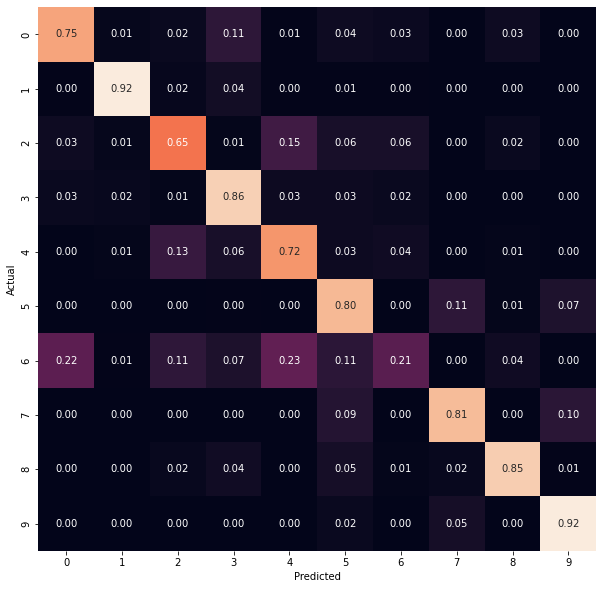

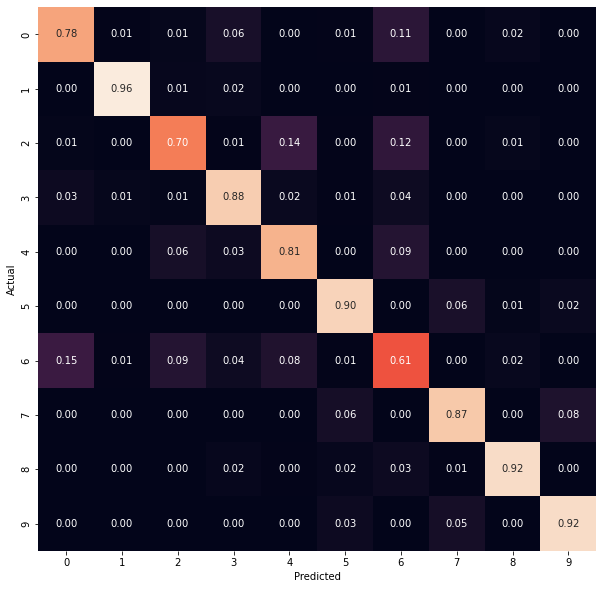

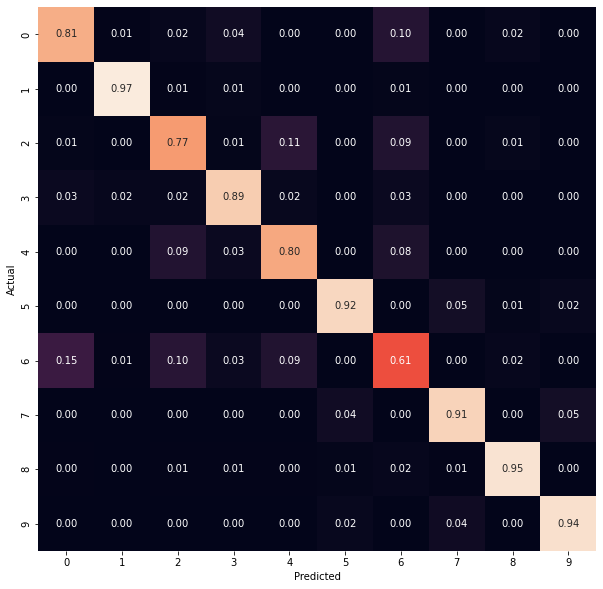

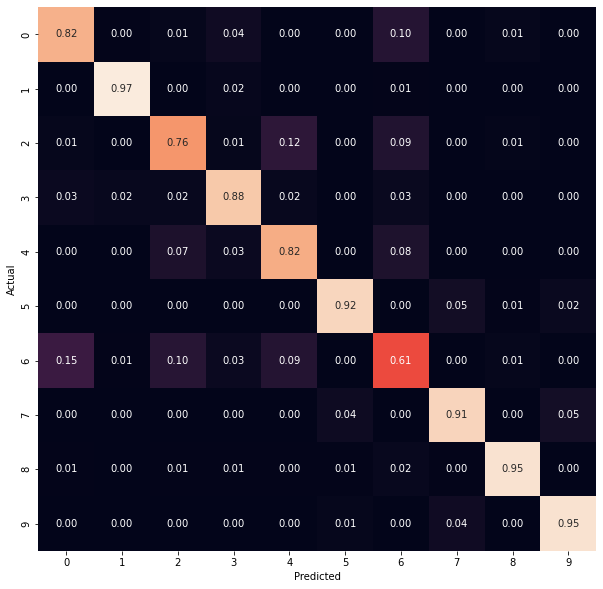

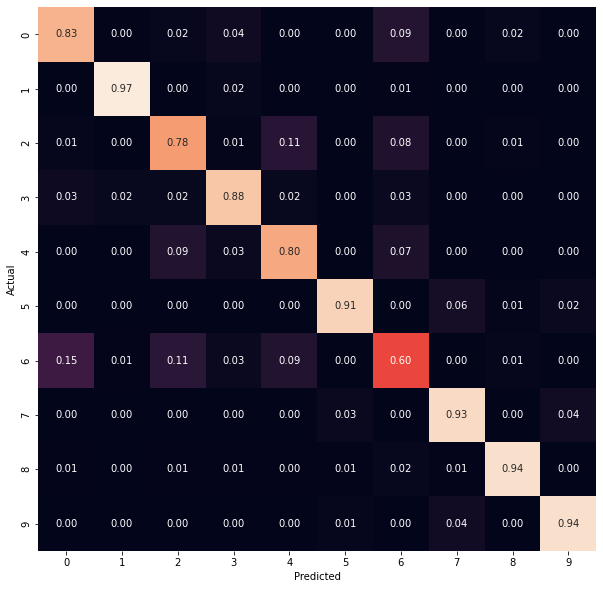

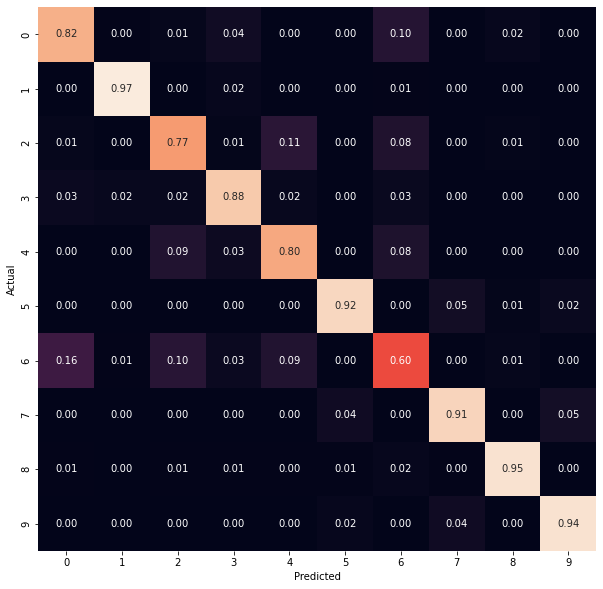

In [6]:
c = .0001
while c != 1000:
    clf = LogisticRegression(penalty='elasticnet', tol=0.1, solver='saga',C=c,
                             l1_ratio=.5).fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    
    print('c is',c)
    print('test accuracy is:',accuracy_score(y_test, y_pred))
    print('train accuracy is:',accuracy_score(y_train, clf.predict(X_train_scaled)))
    
    cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
    p = plt.figure(figsize=(10,10))
    p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
    c *= 10



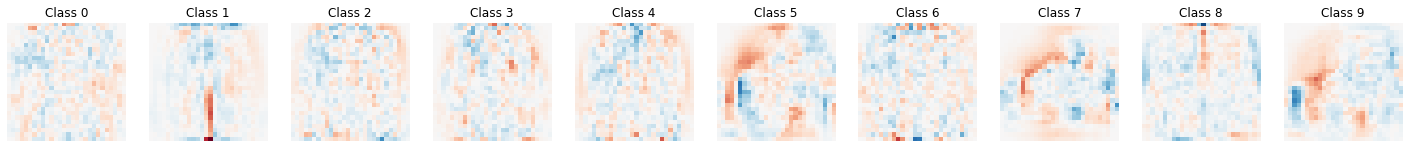

In [6]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i)